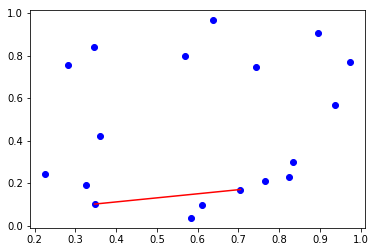

In [60]:
import numpy as np
import matplotlib.pyplot as plt

warm_up()

def warm_up():
    points = np.random.rand(18,2)
    # plot all the points
    plt.plot(points[:, 0], points[:, 1], 'bo')
    # example line drawn between 2 points.
    plt.plot([points[0, 0], points[1, 0]], [points[0, 1], points[1,1]], 'r-')
    plt.show()

conv initialised to  [(0.06470877537271269, 0.2956408742230231)]
adding (0.06915868873802788, 0.4233622062867374) to conv with angle of 0.034826712563310436
adding (0.6681014169208023, 0.8771914096725646) to conv with angle of 0.9223744813377948
adding (0.8269130348179131, 0.9935130742944112) to conv with angle of 0.9386217660602367
adding (0.835843574571796, 0.7758088102568524) to conv with angle of 0.8263966047183215
adding (0.8721952036746731, 0.2777152109661768) to conv with angle of 0.8582505242853767
adding (0.9329240315873416, 0.3661010297739159) to conv with angle of 0.6020074676373185
adding (0.4950905714565854, 0.003998776628225342) to conv with angle of 2.45058477967566
adding (0.5517765531464865, 0.5653093213530644) to conv with angle of 0.10064739579623236
adding (0.7149972261412297, 0.6902705810236969) to conv with angle of 0.9173876302429885
adding (0.7962975309890933, 0.3635399449554406) to conv with angle of 1.029275118640028
adding (0.8138290615499544, 0.5740080318826

/home/ec2-user/jupyter/.lab/lib64/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


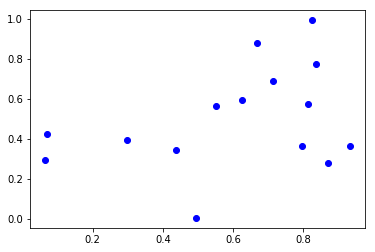

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, asin, pi

def jarvis(points):
    """implement the jarvis march convex hull algorithm"""
    s = leftmost(points)
    conv = [s]
    open_set = [(x,y) for x,y in points]
    print("conv initialised to ", conv)
    # open_set.remove(s)
    while True:
        candidate = s
        min_angle = 2*pi
        for p in open_set:
            pair = {'x1': s[0], 'y1': s[1], 'x2': p[0], 'y2': p[1]}
            angle = angle_between(pair) # TODO: wrong angle!!!
            if angle < min_angle and angle > 0:
                min_angle = angle
                candidate = (pair['x2'], pair['y2'])
            # print("trying", p, "with an angle of ", angle, "current best=", min_angle)
        s = candidate
        if s == conv[0]:
            break
        print("adding", s, "to conv with angle of", min_angle)
        conv.append(s)
        open_set.remove(s)
    return conv

def angle_between(pair):
    """ returns the angle between the two points,
    (pair['x1'], pair['y1']) and (pair['x2'], pair['y2'])"""
    # print("calculating the angle between (", pair['x1'], ",", pair['y1'], ") and (", pair['x2'], ",", pair['y2'], ")")
    dy = abs(pair['y2'] - pair['y1'])
    dx = abs(pair['x2'] - pair['x1'])
    hyp = sqrt(dx**2 + dy**2)
    angle = asin(dx/hyp)
    # add adjustment to get angle from y=y1 to the new point
    if pair['y2'] > pair['y1']:
        if pair['x2'] > pair['x1']:
            # print("top left")
            return angle
        else:
            # print("top right")
            return angle + 3*pi/4
    else:
        if pair['x2'] > pair['x1']:
            # print("bottom left")
            return angle + pi/4
        else:
            # print("bottom right")
            return angle + pi/2

    
def leftmost(points):
    i,j = points[0]
    for x,y in points:
        if i < x:
            continue
        i,j = x,y
    return (i,j)
    
def main():
    points = np.random.rand(15,2)
    plt.plot(points[:, 0], points[:, 1], 'bo')
    conv = jarvis(points)
    print(conv)
    print(angle_between({'x1': 10, 'y1': 13, 'x2': 5, 'y2': 12}))
    # plt.plot(conv[:, 0], conv[:, 1], 'r-')
    plt.show()
    
main()